In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()    
data['suma'] = data.apply(lambda x: sum(x), axis=1)
data1 = data.sort_values(by=['suma'], ascending=False)
data1.head(15)

,0,1,2,3,4,5,6,7,8,9,...,1153,1154,1155,1156,1157,1158,1159,1160,1161,suma
nie,0,2,1,1,1,1,0,23,4,2,...,1,0,0,0,3,1,0,1,0,1386
na,1,0,0,3,1,1,0,12,4,0,...,0,0,0,0,5,0,0,0,0,1080
to,1,2,0,2,0,0,1,15,1,3,...,0,0,0,1,2,0,0,0,0,835
allegro,2,1,0,4,2,0,1,11,1,4,...,0,0,0,0,0,0,0,0,0,785
się,1,0,0,1,0,1,0,10,0,0,...,0,0,0,0,2,1,0,0,0,638
do,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,1,0,0,0,1,589
że,0,0,0,1,0,0,0,11,1,0,...,0,0,0,0,3,0,0,0,0,526
jest,1,0,0,1,1,0,0,14,0,3,...,0,0,0,0,1,0,0,0,0,463
za,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,392
od,0,1,0,0,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,327


In [41]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

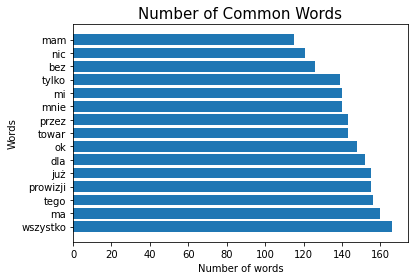

In [6]:
y_pos = np.arange(15)
num = data1['suma'][20:35]

plt.subplot(1, 1, 1)
plt.barh(y_pos, num, align='center')
plt.yticks(y_pos, data1.index[20:35])
plt.title('Number of Common Words', fontsize=15)
plt.xlabel('Number of words')
plt.ylabel('Words')

# plt.tight_layout()
plt.show()

In [44]:
pip install wordcloud


## WordCloud

In [7]:
from wordcloud import WordCloud

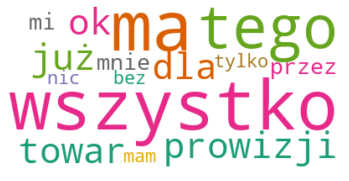

In [8]:
text = ", ".join(data1.index[20:35])
# print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", colormap="Dark2",max_font_size=150).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment with Textblob

- Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
- Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [9]:
import pandas as pd

data = pd.read_pickle('corpus1.pkl')
data

,Sentiment,Opinion
0,0,Francois Nuyts prezes to jest główny winowajca...
1,0,Allegro to nic innego jak zysk od sprzedaży Na...
2,1,Jestem kupującym-nie sprzedającym i jestem bar...
3,0,Allegro obecnie przypomina Bazar Różyckiego. T...
4,0,Sprzedaż na Allegro Lokalnie bez żadnych kosz...
...,...,...
1157,1,Zamówienie złożone online wszystko na plus jeś...
1158,1,spoko loko luz i spontan. Bardzo szybka wysyłk...
1159,1,WSZYSTKO O.K. Tak powinno być wszędzie.
1160,0,Zamówiony towar nigdy nie dotarł.


In [60]:
pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from textblob import TextBlob  # library on top of nltk

In [13]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Opinion'].apply(polarity)
data['subjectivity'] = data['Opinion'].apply(subjectivity)
data['polarity2'] = np.where(data['polarity']>=0, 1, 0)
count = 0
for i in data.index:
    if data['polarity2'][i]==data['Sentiment'][i]:
        count +=1
    else:
        count
print(count)
data.sort_values(by='subjectivity')
# no to textblob nie przewiduje dobrze

644


,Sentiment,Opinion,polarity,subjectivity,polarity2
0,0,Francois Nuyts prezes to jest główny winowajca...,0.00,0.0,1
705,1,"Wszystko wg zamówienia, z dostawą i wniesienie...",0.00,0.0,1
706,0,Zakupiona i zwrócona lodówka. Zwrotu pieniędzy...,0.00,0.0,1
708,1,Sprawnie i szybko otrzymałam zamówiony produkt,0.00,0.0,1
709,1,Mój zakup rewelacyjny b.dobrej jakości no i ra...,0.00,0.0,1
...,...,...,...,...,...
1130,1,"wszystko przebiegło jak należy , polecam ;)",0.25,1.0,1
593,1,wiedziałam co kupuję i to otrzymałam :) bez ni...,0.50,1.0,1
179,0,"Wysokie prowizje. Motoryzacja, nowe części sam...",-0.50,1.0,0
175,0,Pożeracze prowizji. Niedługo zostaną sami jako...,0.50,1.0,1
